In [1]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()


# Create Chat Model
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)


In [3]:
# custom tools


def multiplay(a: int, b: int) -> int:
    """Multiplay a and b

    Args
        a: first init
        b: second init
    """
    return a * b

def add(a: int, b: int) -> int:
    """add a and b

    Args
        a: first init
        b: second init
    """
    return a + b

def divide(a: int, b: int) -> int:
    """divide a and b

    Args
        a: first init
        b: second init
    """
    return a / b

tools = [add,multiplay,divide]
tools

[<function __main__.add(a: int, b: int) -> int>,
 <function __main__.multiplay(a: int, b: int) -> int>,
 <function __main__.divide(a: int, b: int) -> int>]

In [ ]:
llm_with_tools=llm.bind_tools(tools)
llm

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x10de2cd70>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x10de2d7f0>, root_client=<openai.OpenAI object at 0x10d7f9e80>, root_async_client=<openai.AsyncOpenAI object at 0x10de2d550>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'add', 'description': 'add a and b Args\n    a: first init\n    b: second init', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'multiplay', 'description': 'Multiplay a and b Args\n    a: first init\n    b: second init', 'parameters': {'properties': {'a': {'type': 'integer'}, 'b': {'type': 'integer'}}, 'required': ['a', 'b'], 'type': 'object'}}}, {'type': 'function', 'function

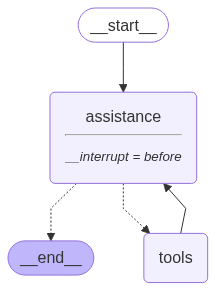

In [31]:
# workflow

from langgraph.graph import START, END, StateGraph
from langgraph.graph import MessagesState
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import tools_condition, ToolNode
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from IPython.display import display, Image


sys = SystemMessage(
    content="You are a helpfull assistant task with porforming arthmetic on a section"
)


# node
def assistance(state: MessagesState):
    return {"message": llm_with_tools.invoke([sys] + state["messages"])}


graph = StateGraph(MessagesState)

graph.add_node("assistance", assistance)
graph.add_node("tools", ToolNode(tools))


# Define the edges
graph.add_edge(START, "assistance")
graph.add_conditional_edges("assistance", tools_condition)
graph.add_edge("tools", "assistance")

memory = MemorySaver()

graph = graph.compile(interrupt_before=["assistance"], checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
thread = {"configurable": {"thread_id": "123"}}
initial_input = {"messages": [HumanMessage(content="multiply 2 and 3")]}


In [33]:
# Corrected thread and input
thread = {"configurable": {"thread_id": "123"}}
initial_input = {"messages": [HumanMessage(content="multiply 2 and 3")]}

# Stream from the graph
for event in graph.stream(initial_input, thread, stream_mode="values"):
    event['messages'][-1].pretty_print()


================================ Human Message =================================

multiply 2 and 3
